## Imports & Constants

In [3]:
import gymnasium as gym

from stable_baselines3 import PPO

import torch
import numpy as np
from agents import DQNAgent

## Environment & Model

In [6]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

In [ ]:
model = PPO("MlpPolicy", env, verbose=1)

# Train the PPO agent
model.learn(total_timesteps=10_000)

## Visualise the Environment & Trained Agent

In [ ]:
vec_env = model.get_env()
obs = vec_env.reset()

for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    vec_env.render()

    # VecEnv resets automatically
    # if done:
    #   obs = vec_env.reset()

env.close()

# Using our implementation of DQN

In [4]:
seed = 777

def seed_torch(seed):
    torch.manual_seed(seed)
    if torch.backends.cudnn.enabled:
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

np.random.seed(seed)
seed_torch(seed)

In [5]:
# Environment
env = gym.make("CartPole-v1", max_episode_steps=200, render_mode="rgb_array")

In [6]:
# Parameters
num_frames = 10000
memory_size = 1000
batch_size = 32
target_update = 100
epsilon_decay = 1 / 2000

agent = DQNAgent(env, memory_size, batch_size, target_update, epsilon_decay, seed)

cuda


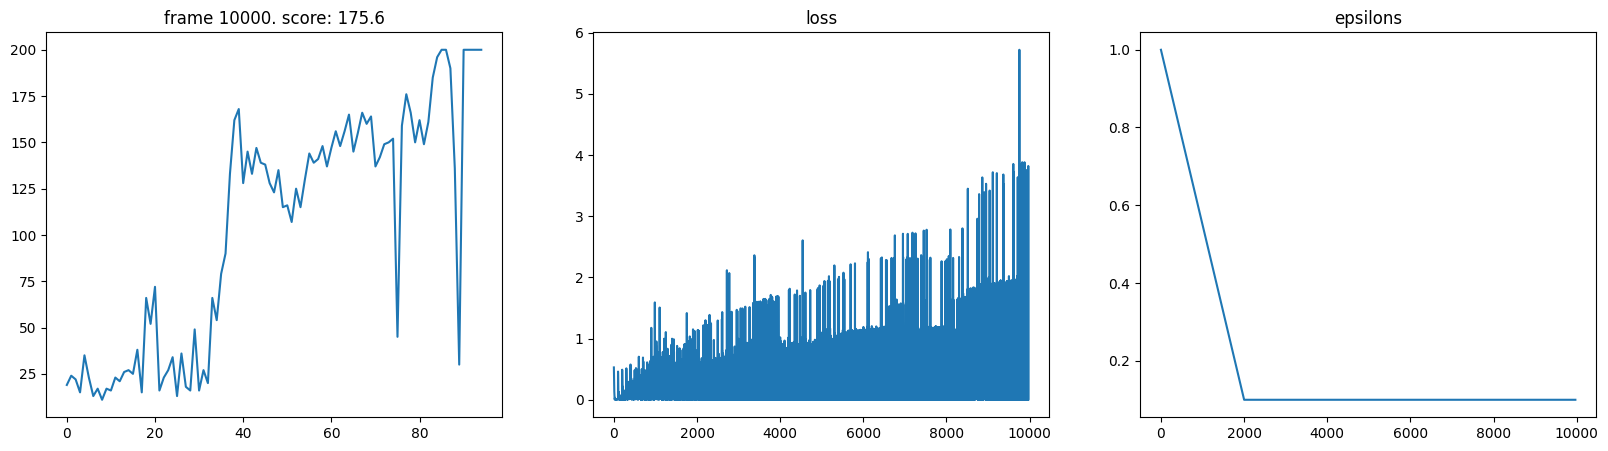

In [7]:
agent.train(num_frames)